In [7]:
# Import relevant libraries
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from skimage.metrics import structural_similarity as compare_ssim
import cv2
import copy

In [12]:
# Function for producing differenced image at RGB color channels

def img_diff(orig_image, new_image):
    # Convert images to grayscale
    imageA = copy.deepcopy(orig_image)
    imageB = copy.deepcopy(new_image)
    grayA = cv2.cvtColor(imageA, cv2.COLOR_RGB2GRAY)
    grayB = cv2.cvtColor(imageB, cv2.COLOR_RGB2GRAY)

    # compute the Structural Similarity Index (SSIM) between the two
    # images, ensuring that the difference image is returned
    (score, diff) = compare_ssim(grayA, grayB, full=True)
    diff = (diff * 255).astype("uint8")

    # threshold the difference image, followed by finding contours to
    # obtain the regions of the two input images that differ
    thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

    # Display image differences
    f, axarr = plt.subplots(2,2)
    axarr[0,0].imshow(imageA)
    axarr[0,1].imshow(imageB)
    axarr[1,0].imshow(diff)
    axarr[1,1].imshow(thresh)

    # Return the differenced threshold image
    return thresh

In [13]:
# Load images
img_names = ['San_Cristobal-2020-01-26.png','San_Cristobal-2020-03-08.png','San_Cristobal-2019-12-25.png',
             'San_Cristobal-2021-02-28.png','San_Cristobal-2021-03-21.png',
             'Kilauea-2020-12-27-b589.png','Kilauea-2021-01-31-b589.png']
img_list3 = []
for image in img_names:
    new_img_string = 'sample_images/' + image
    new_img = plt.imread(new_img_string)
    img_list3.append(new_img)

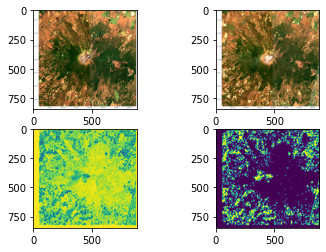

In [14]:
# Test the image differencing function
diff_img = img_diff(img_list3[0], img_list3[3])

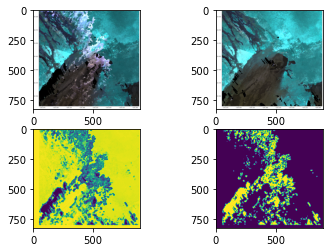

In [15]:
# Test the image differencing function
diff_img = img_diff(img_list3[5], img_list3[6])